In [2]:
from transformers import CLIPModel

In [3]:
model =CLIPModel.from_pretrained("openai/clip-vit-large-patch14")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [4]:
from transformers import AutoProcessor

In [5]:
Processor =AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
from PIL import Image
image = Image.open('/content/2.jpg')

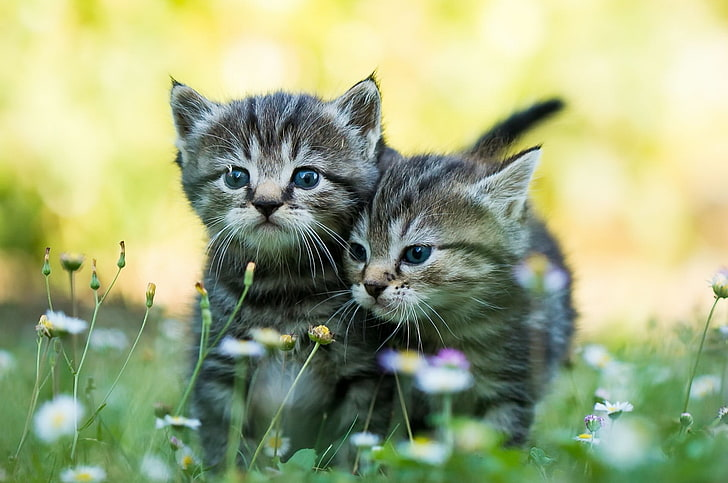

In [9]:
image

In [10]:
labels = ['a photo of a cat',
          'a photo of a dog']

In [11]:
inputs=Processor(text=labels,
                 images=image,
                 return_tensors="pt",
                 padding=True)

In [12]:
outputs=model(**inputs)

In [13]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[23.5094, 17.2763]], grad_fn=<TBackward0>), logits_per_text=tensor([[23.5094],
        [17.2763]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0031,  0.0028,  0.0291,  ...,  0.0227,  0.0088,  0.0132],
        [ 0.0091, -0.0039,  0.0203,  ...,  0.0310,  0.0025,  0.0109]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-1.2640e-02,  1.1862e-02,  1.9667e-02, -2.1922e-02,  2.5032e-02,
          1.3779e-02,  2.7582e-02,  1.8168e-02,  2.4975e-02, -2.3710e-02,
         -2.4362e-02, -7.8997e-03,  2.4467e-02,  3.1632e-02, -2.6781e-02,
          3.9216e-02, -1.7103e-02, -5.1891e-03,  2.0625e-02, -1.9092e-02,
         -1.6482e-02, -1.9800e-02,  1.7588e-02,  1.5417e-02, -3.8397e-02,
         -3.1727e-02,  1.8862e-02, -2.3499e-02,  4.3906e-03,  1.4445e-02,
          1.7827e-03,  7.3699e-03,  1.9068e-02, -3.7481e-02,  3.1610e-02,
          1.6994e-02, -1.8450e-02, -1.3574e-02, -2.8028e-02, -1.5772e-02,
         -5.9921e-03,  2.9923e-02,  2.6

In [14]:
outputs.logits_per_image

tensor([[23.5094, 17.2763]], grad_fn=<TBackward0>)

In [15]:
probs=outputs.logits_per_image.softmax(dim=1)[0]

In [16]:
probs

tensor([0.9980, 0.0020], grad_fn=<SelectBackward0>)

In [17]:
probs=list(probs)

In [22]:
for i in range(len(probs)):
    print(f"The Label is {labels[i]} with Probabilityof {probs[i]}\n")

The Label is a photo of a cat with Probabilityof 0.9980406165122986

The Label is a photo of a dog with Probabilityof 0.001959380228072405

